In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from train_cfy import *
def wave_tree(x, l):
    l_pred = model1.predict_classes(x)
    l_pred = np.reshape(l_pred, (len(l_pred)))
    x0, l0 = x[l_pred==0], l[l_pred==0]
    x1, l1 = x[l_pred==1], l[l_pred==1]
    
    l0_pred = model2.predict_classes(x0)
    l0_pred = np.reshape(l0_pred, (len(l0_pred)))
    
    l1_pred = model3.predict_classes(x1)
    l1_pred = np.reshape(l1_pred, (len(l1_pred)))
    
    l1_pred[l1_pred==0]=2
    l1_pred[l1_pred==1]=3
    
    l_true = np.concatenate((l0, l1))
    l_pred = np.concatenate((l0_pred, l1_pred))
    return l_true, l_pred
def draw_cm(y_true, y_pred):
    
    plt.figure(figsize=(6,4))
    ax = plt.subplot(1,1,1)
    cm = metrics.confusion_matrix(y_true, y_pred)
    cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]

    sns.heatmap(cm, annot=True, ax = ax)
    buttom, top = ax.get_ylim()
    ax.set_xlabel("Pred")
    ax.set_ylabel("True")
    ax.set_ylim(buttom+0.5, top-0.5)
    plt.show()
    

In [73]:
#data_path = './data/eeg_window_10/class4_nocut/'
data_path = './data/eeg_window_10/class2_nocut/'

In [74]:
_, l_train, x_valid, l_valid = load_data(data_path)
x_valid.shape, l_valid.shape

for i in range(4):
    print(len(l_train[l_train==i]))
for i in range(4):
    print(len(l_valid[l_valid==i]))

(8106, 1250, 3) (2027, 1250, 3)
4644
3462
0
0
1198
829
0
0


In [80]:
#L1 = 'results/210419_1520_cfy1_class2/'
L1 = 'results/04211947_class2_nocut'
L1 = 'results/04211947_class2'

#L2low = 'results/210420_1404_cfy1_class2'
L2low = 'results/04212200_under_basic'

#L2high = 'results/210421_1009_class2'
L2high = 'results/04230848_upper_basic'

C4 = 'results/04212034_class4_b03/'

In [77]:
model1 = tf.keras.models.load_model('%s/model.h5'%L1)
model2 = tf.keras.models.load_model('%s/model.h5'%L2low)
model3 = tf.keras.models.load_model('%s/model.h5'%L2high)
model4 = tf.keras.models.load_model('%s/model.h5'%C4)

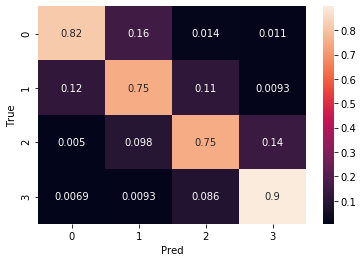

((2027,), (2027,))

In [72]:
l_true, l_pred = wave_tree(x_valid, l_valid)
draw_cm(l_true, l_pred)
l_true.shape, l_pred.shape

In [81]:
l_pred = model1.predict_classes(x_valid)

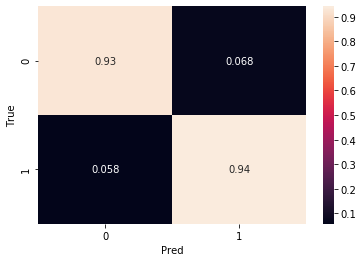

In [82]:
draw_cm(l_valid, l_pred)